In [2]:
# =========================
# Amazon Best-Selling Books Analysis
# =========================

In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
# =========================
# 2. Load Dataset
# =========================

In [5]:
df = pd.read_excel(r"C:\Users\urjam\Dude\Amazon\Amazon_top100_bestselling_books_2009to2021.xlsx")  # Replace with your dataset path
df.head()

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction


In [6]:
# =========================
# 3. Data Cleaning & Preprocessing
# =========================

In [11]:
# Create binary target: Top 10 bestseller
df['top_10'] = df['ranks'].apply(lambda x: 1 if x <= 10 else 0)

# Encode categorical variables
categorical_cols = ['genre', 'cover_type']  # fixed column names
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and target
X = df_encoded.drop(columns=['ranks', 'title', 'author', 'top_10'])
y = df_encoded['top_10']

# Optional: scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['no_of_reviews', 'ratings', 'year']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [12]:
# =========================
# 4. Exploratory Data Analysis (EDA)
# =========================

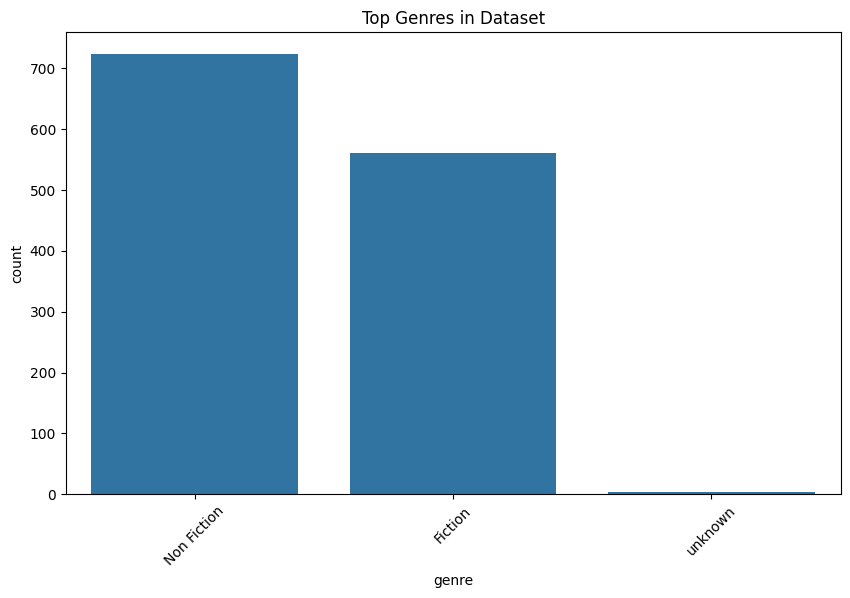

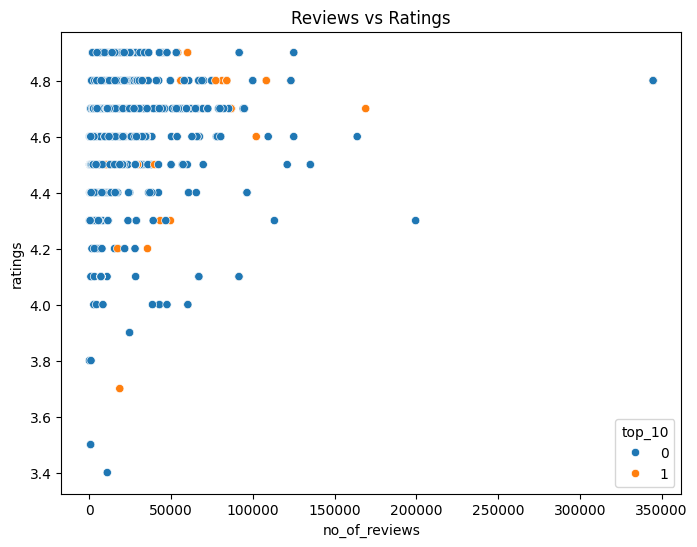

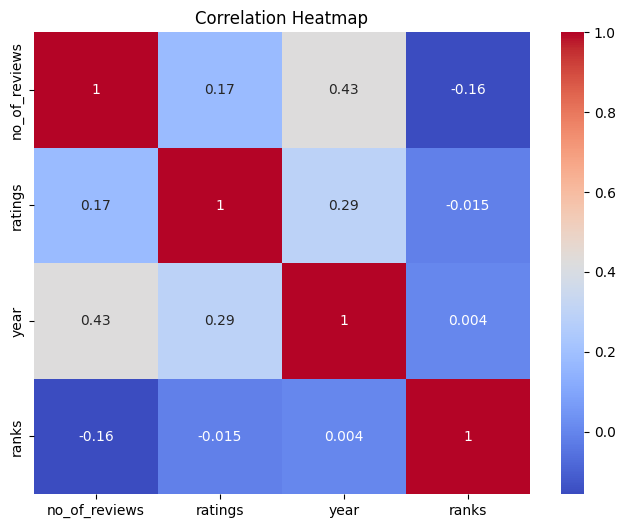

In [16]:
# Top genres
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.title("Top Genres in Dataset")
plt.xticks(rotation=45)
plt.show()

# Reviews vs Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='no_of_reviews', y='ratings', hue='top_10')
plt.title("Reviews vs Ratings")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['no_of_reviews', 'ratings', 'year', 'ranks']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# =========================
# 5. Train-Test Split
# =========================

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# =========================
# 6. Model Training
# =========================

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# =========================
# 7. Model Evaluation
# =========================

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       233
           1       0.82      0.35      0.49        26

    accuracy                           0.93       259
   macro avg       0.87      0.67      0.72       259
weighted avg       0.92      0.93      0.91       259

ROC-AUC Score: 0.901617695609112


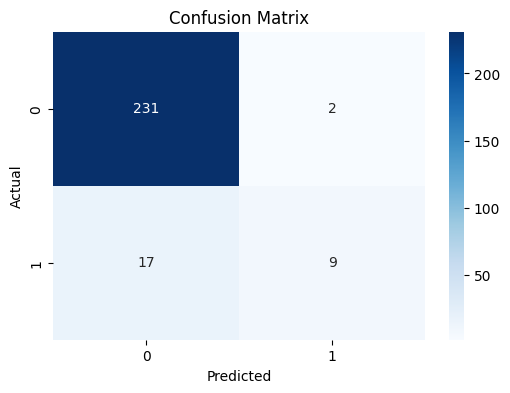

In [23]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# =========================
# 8. Feature Importance
# =========================

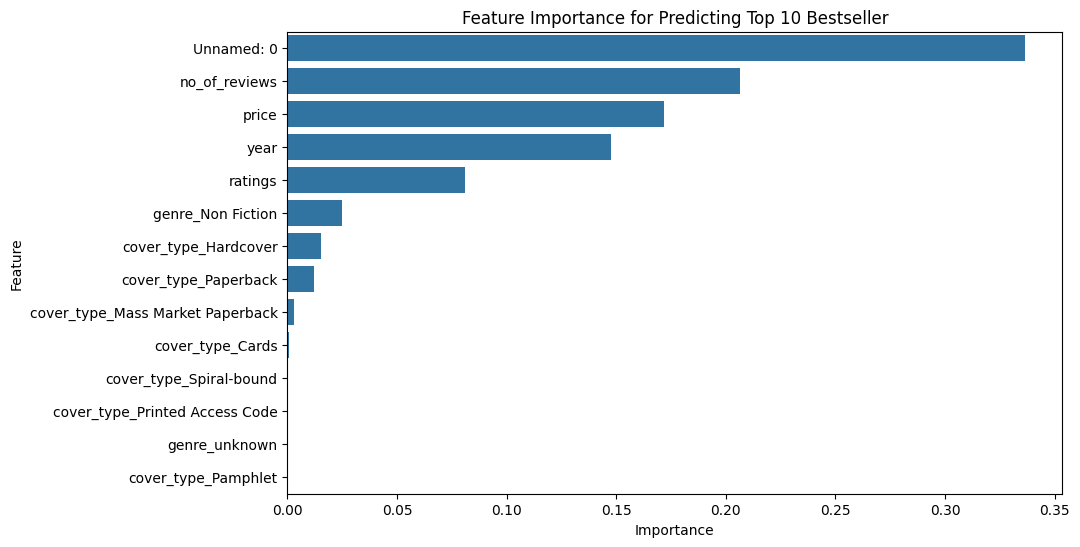

In [25]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance for Predicting Top 10 Bestseller")
plt.show()

In [26]:
df['top_10'] = df['ranks'].apply(lambda x: 1 if x <= 10 else 0)

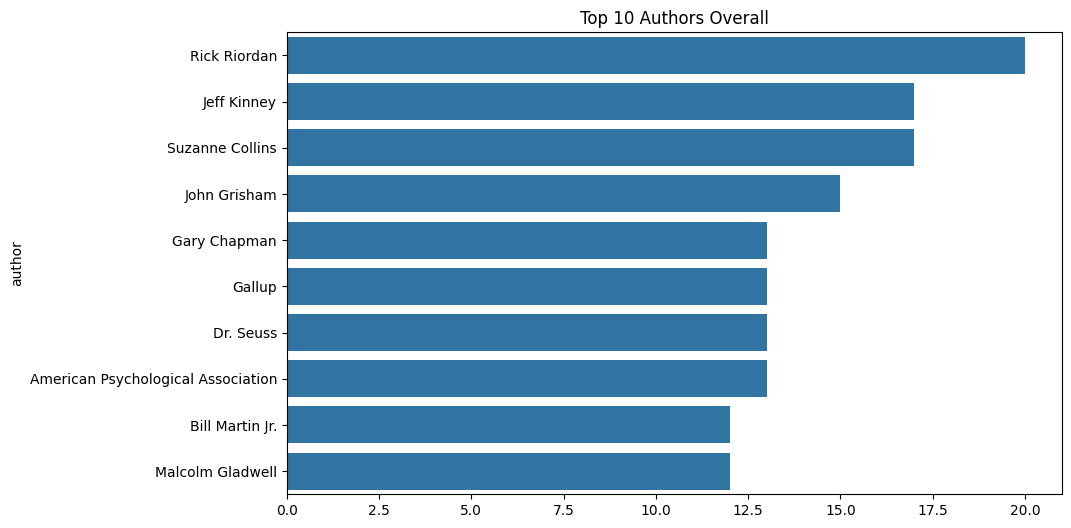

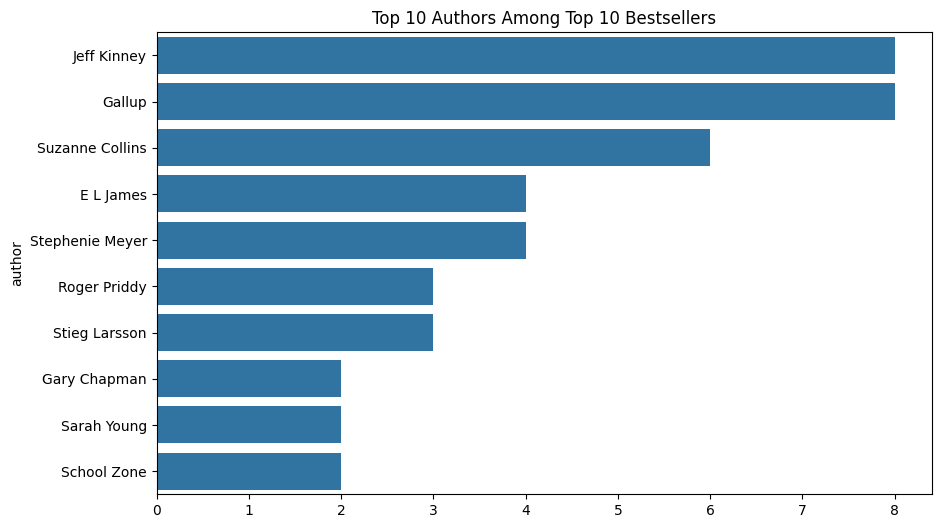

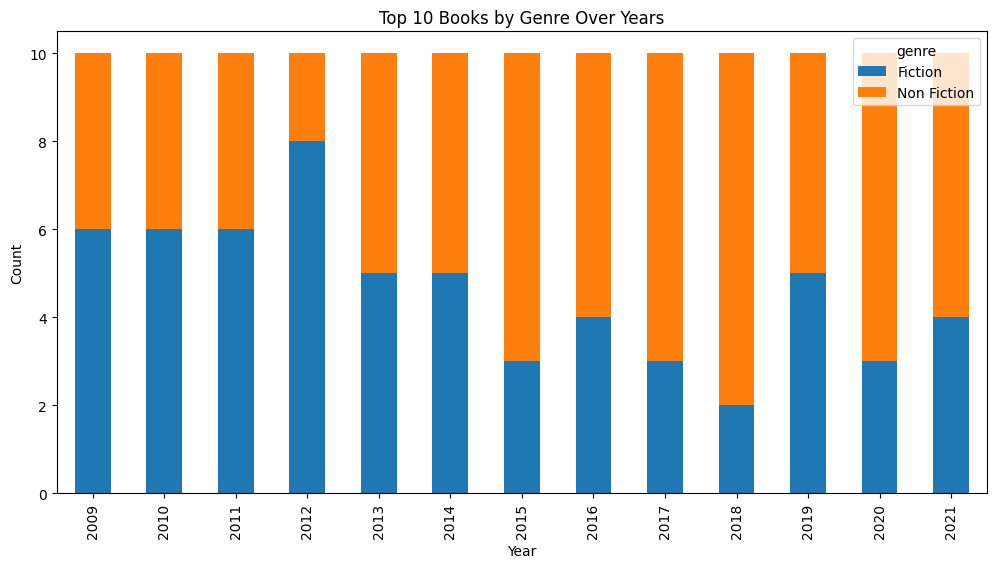

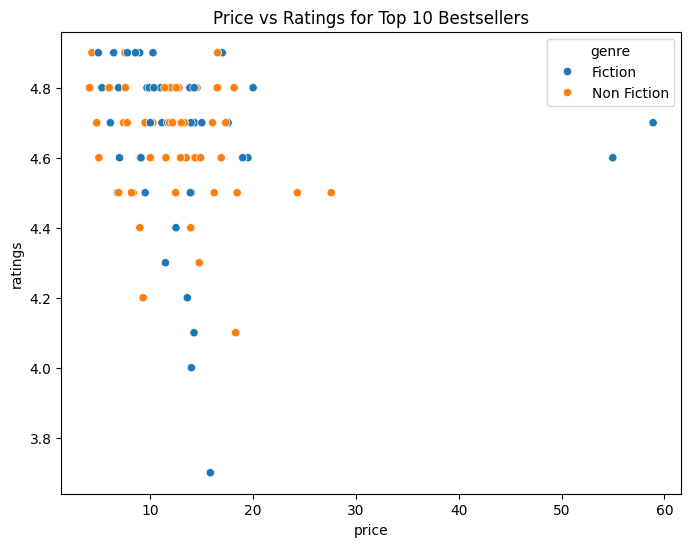

<Figure size 800x600 with 0 Axes>

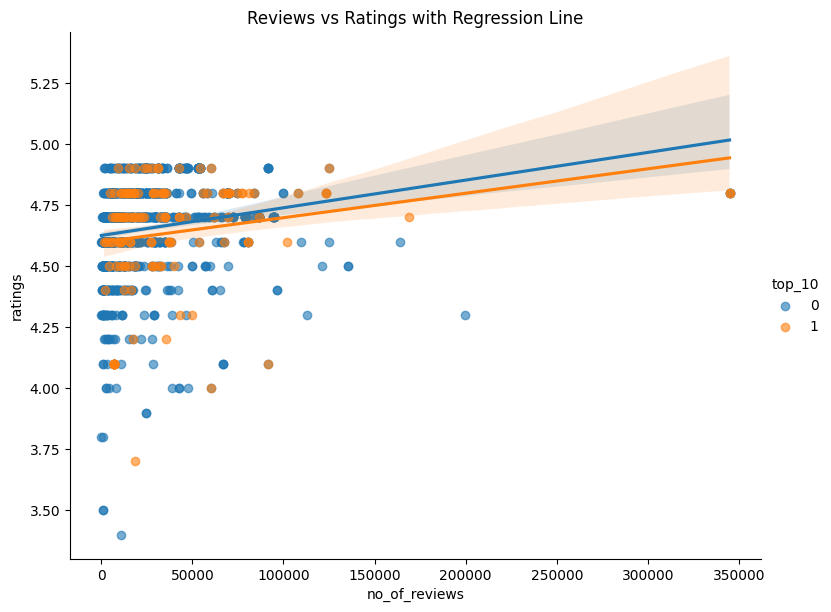

In [27]:
# =========================
# 9. Additional Insights
# =========================

# Top 10 authors overall and in top 10
plt.figure(figsize=(10,6))
top_authors_all = df['author'].value_counts().head(10)
sns.barplot(x=top_authors_all.values, y=top_authors_all.index)
plt.title("Top 10 Authors Overall")
plt.show()

plt.figure(figsize=(10,6))
top_authors_top10 = df[df['top_10'] == 1]['author'].value_counts().head(10)
sns.barplot(x=top_authors_top10.values, y=top_authors_top10.index)
plt.title("Top 10 Authors Among Top 10 Bestsellers")
plt.show()

# Trend of top 10 books by genre over the years
top_genre_year = df[df['top_10'] == 1].groupby(['year','genre']).size().unstack(fill_value=0)
top_genre_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Top 10 Books by Genre Over Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

# Price vs Ratings for top 10 books
plt.figure(figsize=(8,6))
sns.scatterplot(data=df[df['top_10']==1], x='price', y='ratings', hue='genre')
plt.title("Price vs Ratings for Top 10 Bestsellers")
plt.show()

# Reviews vs Ratings with regression line
plt.figure(figsize=(8,6))
sns.lmplot(data=df, x='no_of_reviews', y='ratings', hue='top_10', height=6, aspect=1.3, scatter_kws={'alpha':0.6})
plt.title("Reviews vs Ratings with Regression Line")
plt.show()

In [29]:
# Select relevant columns
predicted_top_books = df.sort_values(by='pred_top10_prob', ascending=False)[
    ['title','author','genre','price','ratings','no_of_reviews','pred_top10_prob']
].head(10)

# Style the table
styled_table = predicted_top_books.style \
    .background_gradient(subset=['pred_top10_prob'], cmap='YlGnBu') \
    .bar(subset=['ratings'], color='lightgreen') \
    .bar(subset=['no_of_reviews'], color='lightcoral') \
    .format({'price':'${:,.2f}', 'ratings':'{:.1f}', 'pred_top10_prob':'{:.2%}', 'no_of_reviews':'{:,}'}) \
    .set_caption("Top Predicted Amazon Bestsellers with Probabilities") \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#40466e'), 
                                     ('color', 'white'), 
                                     ('font-size', '12pt')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), 
                                          ('font-size', '14pt'), 
                                          ('color', '#40466e'), 
                                          ('font-weight', 'bold')]}
    ])

styled_table

,title,author,genre,price,ratings,no_of_reviews,pred_top10_prob
5,StrengthsFinder 2.0,Gallup,Non Fiction,$18.29,4.1,"7,082.0",94.00%
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,Fiction,$14.30,4.7,"16,912.0",94.00%
596,StrengthsFinder 2.0,Gallup,Non Fiction,$18.29,4.1,"7,082.0",93.00%
0,The Lost Symbol,Dan Brown,Fiction,$12.49,4.4,"16,118.0",92.00%
103,StrengthsFinder 2.0,Gallup,Non Fiction,$18.29,4.1,"7,082.0",91.00%
4,Going Rogue: An American Life,Sarah Palin,Non Fiction,$9.99,4.6,"1,572.0",91.00%
795,The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life,Mark Manson,Non Fiction,$14.35,4.6,"80,328.0",89.00%
693,StrengthsFinder 2.0,Gallup,Non Fiction,$18.29,4.1,"7,082.0",89.00%
197,StrengthsFinder 2.0,Gallup,Non Fiction,$18.29,4.1,"7,082.0",89.00%
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,Non Fiction,$9.93,4.8,"5,036.0",89.00%
